In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE= 256
BATCH_SIZE=32

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [4]:
class_names=dataset.class_names

In [5]:
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
len(dataset)

645

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[ 7 11  9 13  1  1  3  9  0  6 10 12  1 14  0  7  7  9 14  3  5 12  0  6
  5  9  9  6  6 11 14 11]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[198. 183. 188.]
  [196. 181. 186.]
  [192. 177. 182.]
  ...
  [199. 188. 192.]
  [202. 191. 195.]
  [205. 194. 198.]]

 [[193. 178. 183.]
  [191. 176. 181.]
  [189. 174. 179.]
  ...
  [199. 188. 192.]
  [200. 189. 193.]
  [202. 191. 195.]]

 [[192. 177. 182.]
  [191. 176. 181.]
  [189. 174. 179.]
  ...
  [204. 193. 197.]
  [204. 193. 197.]
  [204. 193. 197.]]

 ...

 [[142. 128. 128.]
  [144. 130. 130.]
  [143. 129. 129.]
  ...
  [179. 167. 167.]
  [177. 165. 165.]
  [175. 163. 163.]]

 [[142. 128. 128.]
  [144. 130. 130.]
  [141. 127. 127.]
  ...
  [177. 165. 165.]
  [177. 165. 165.]
  [178. 166. 166.]]

 [[146. 132. 132.]
  [149. 135. 135.]
  [144. 130. 130.]
  ...
  [173. 161. 161.]
  [175. 163. 163.]
  [178. 166. 166.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[144., 148., 151.],
        [144., 148., 151.],
        [145., 149., 152.],
        ...,
        [115., 113., 116.],
        [104., 102., 105.],
        [115., 113., 116.]],

       [[144., 148., 151.],
        [144., 148., 151.],
        [145., 149., 152.],
        ...,
        [114., 112., 115.],
        [100.,  98., 101.],
        [105., 103., 106.]],

       [[144., 148., 151.],
        [144., 148., 151.],
        [145., 149., 152.],
        ...,
        [131., 129., 132.],
        [122., 120., 123.],
        [121., 119., 122.]],

       ...,

       [[184., 187., 194.],
        [182., 185., 192.],
        [180., 183., 190.],
        ...,
        [137., 130., 137.],
        [125., 118., 125.],
        [121., 114., 121.]],

       [[182., 185., 192.],
        [181., 184., 191.],
        [179., 182., 189.],
        ...,
        [145., 138., 145.],
        [106.,  99., 106.],
       

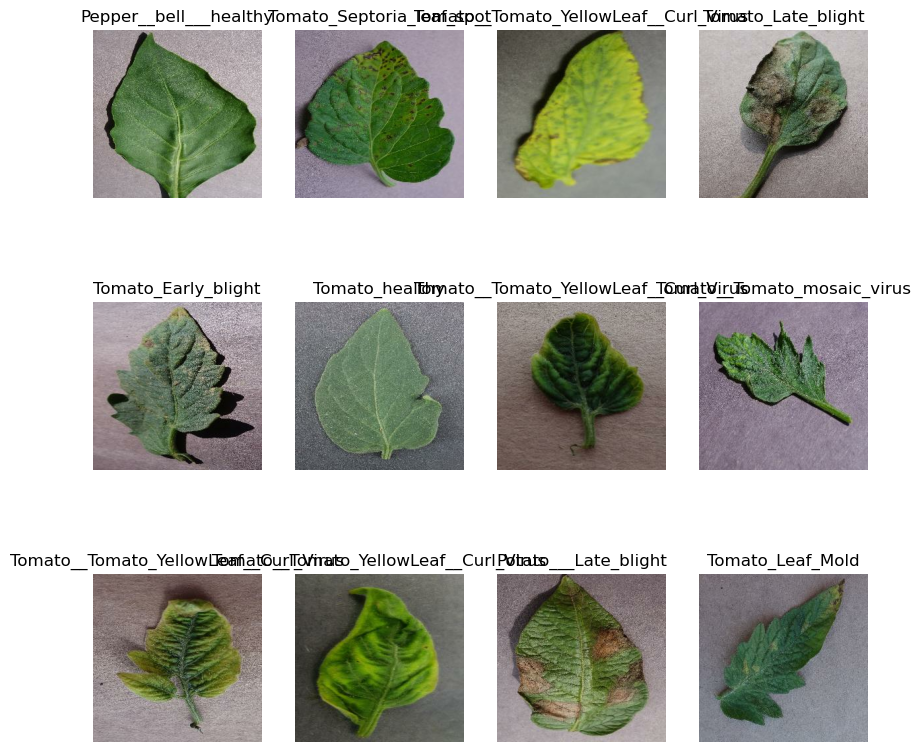

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) #convert into the integers as it is the float
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
train_size=0.8
len(dataset)*train_size

516.0

In [12]:
train_dataset=dataset.take(54) #datset[:54]
len(train_dataset)

54

In [13]:
remaing_dataset=dataset.skip(54) #dataset[54:]
len(remaing_dataset)

591

In [14]:
# 10 percentage of validation set
val_size=0.1
len(dataset)*val_size

64.5

In [15]:
validation_datset=remaing_dataset.take(6)
len(validation_datset)

6

In [16]:
test_dataset=remaing_dataset.skip(6)
len(test_dataset)

585

In [17]:
#take the tensorflow dataset and split the train,test,val using below function
def dataset_partitioning_tf(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=100):
    ds_size=len(dataset)
    
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)#seed is for just predictability same seed every time it will give you same result
    
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    test_size=int(ds_size*test_split)
    
    train_ds=dataset.take(train_size)
    rem_ds=dataset.skip(train_size)
    val_ds=rem_ds.take(val_size)
    test_ds=rem_ds.skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds=dataset_partitioning_tf(dataset)

In [19]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

516
64
65


In [20]:
train_ds=train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
#this improve the preformance of pipeline as it stores the images in cache
#if we are using GPU or CPU if GPU is busy taining prefetch will load the next set of batch from your disk that will improve the performance

In [21]:
#scaling the numpy array between 0-1 by dviding it by 255 (rgb)
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
# data augmentaion
data_augmentaion=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.1)
])

In [23]:
CHANNELS = 3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=15
model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
EPOCHS=50

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    
)

Epoch 1/50
516/516 [==============================] - 632s 1s/step - loss: 1.7108 - accuracy: 0.4371 - val_loss: 1.0000 - val_accuracy: 0.6763
Epoch 2/50
516/516 [==============================] - 613s 1s/step - loss: 0.8162 - accuracy: 0.7316 - val_loss: 0.6924 - val_accuracy: 0.7627
Epoch 3/50
516/516 [==============================] - 548s 1s/step - loss: 0.5625 - accuracy: 0.8121 - val_loss: 0.4645 - val_accuracy: 0.8384
Epoch 4/50
516/516 [==============================] - 549s 1s/step - loss: 0.4412 - accuracy: 0.8501 - val_loss: 0.4257 - val_accuracy: 0.8589
Epoch 5/50
516/516 [==============================] - 548s 1s/step - loss: 0.3598 - accuracy: 0.8751 - val_loss: 0.2978 - val_accuracy: 0.8960
Epoch 6/50
516/516 [==============================] - 555s 1s/step - loss: 0.3039 - accuracy: 0.8940 - val_loss: 0.2523 - val_accuracy: 0.9165
Epoch 7/50
516/516 [==============================] - 551s 1s/step - loss: 0.2551 - accuracy: 0.9124 - val_loss: 0.2809 - val_accuracy: 0.9067

In [28]:
scores = model.evaluate(test_ds)

65/65 [==============================] - 30s 219ms/step - loss: 0.1822 - accuracy: 0.9615


In [29]:
scores

[0.18218079209327698, 0.96150141954422]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 516}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history.history['accuracy']

[0.43707606196403503,
 0.731589138507843,
 0.8120760917663574,
 0.8501090407371521,
 0.8750605583190918,
 0.894016444683075,
 0.9124273061752319,
 0.9255087375640869,
 0.9287790656089783,
 0.9333212375640869,
 0.9476743936538696,
 0.9517320990562439,
 0.9582727551460266,
 0.9608769416809082,
 0.9561530947685242,
 0.9636022448539734,
 0.9675387740135193,
 0.9630571603775024,
 0.9703246355056763,
 0.9742611646652222,
 0.9760780334472656,
 0.9758357405662537,
 0.9720808863639832,
 0.9711724519729614,
 0.9831637740135193,
 0.9763808250427246,
 0.9809229373931885,
 0.9730498790740967,
 0.9859496355056763,
 0.9844355583190918,
 0.9780159592628479,
 0.9815285801887512,
 0.9792878031730652,
 0.9861918687820435,
 0.9825581312179565,
 0.9842538833618164,
 0.9824975728988647,
 0.984677791595459,
 0.9839510917663574,
 0.9887354373931885,
 0.9859496355056763,
 0.9804990291595459,
 0.9897650480270386,
 0.9825581312179565,
 0.9884932041168213,
 0.9849806427955627,
 0.9848594665527344,
 0.987100303173

In [34]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

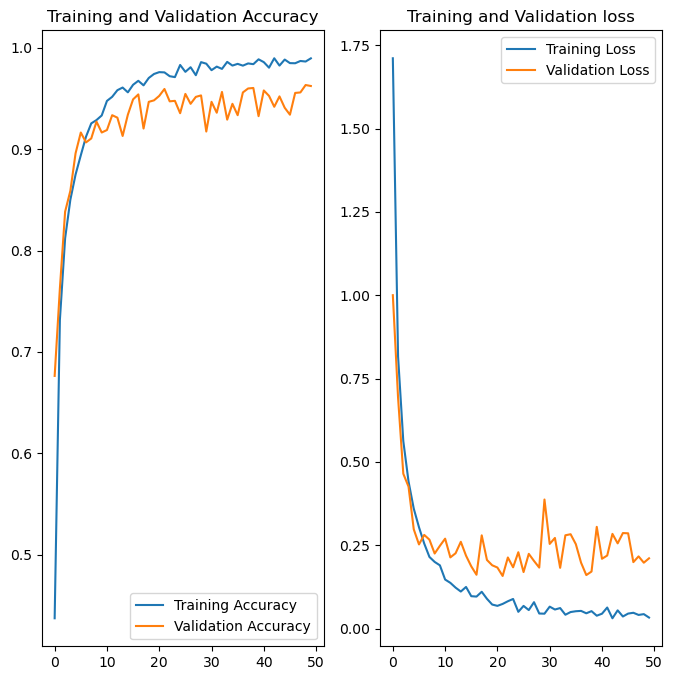

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend()
plt.title("Training and Validation loss")

first image to predict
actual label: Tomato__Target_Spot
1/1 [==============================] - 4s 4s/step
predicted label: Tomato__Target_Spot


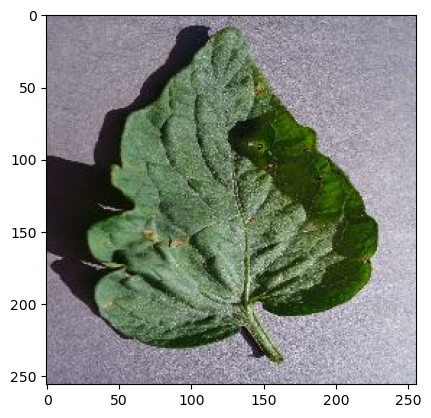

In [36]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [38]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 48ms/step


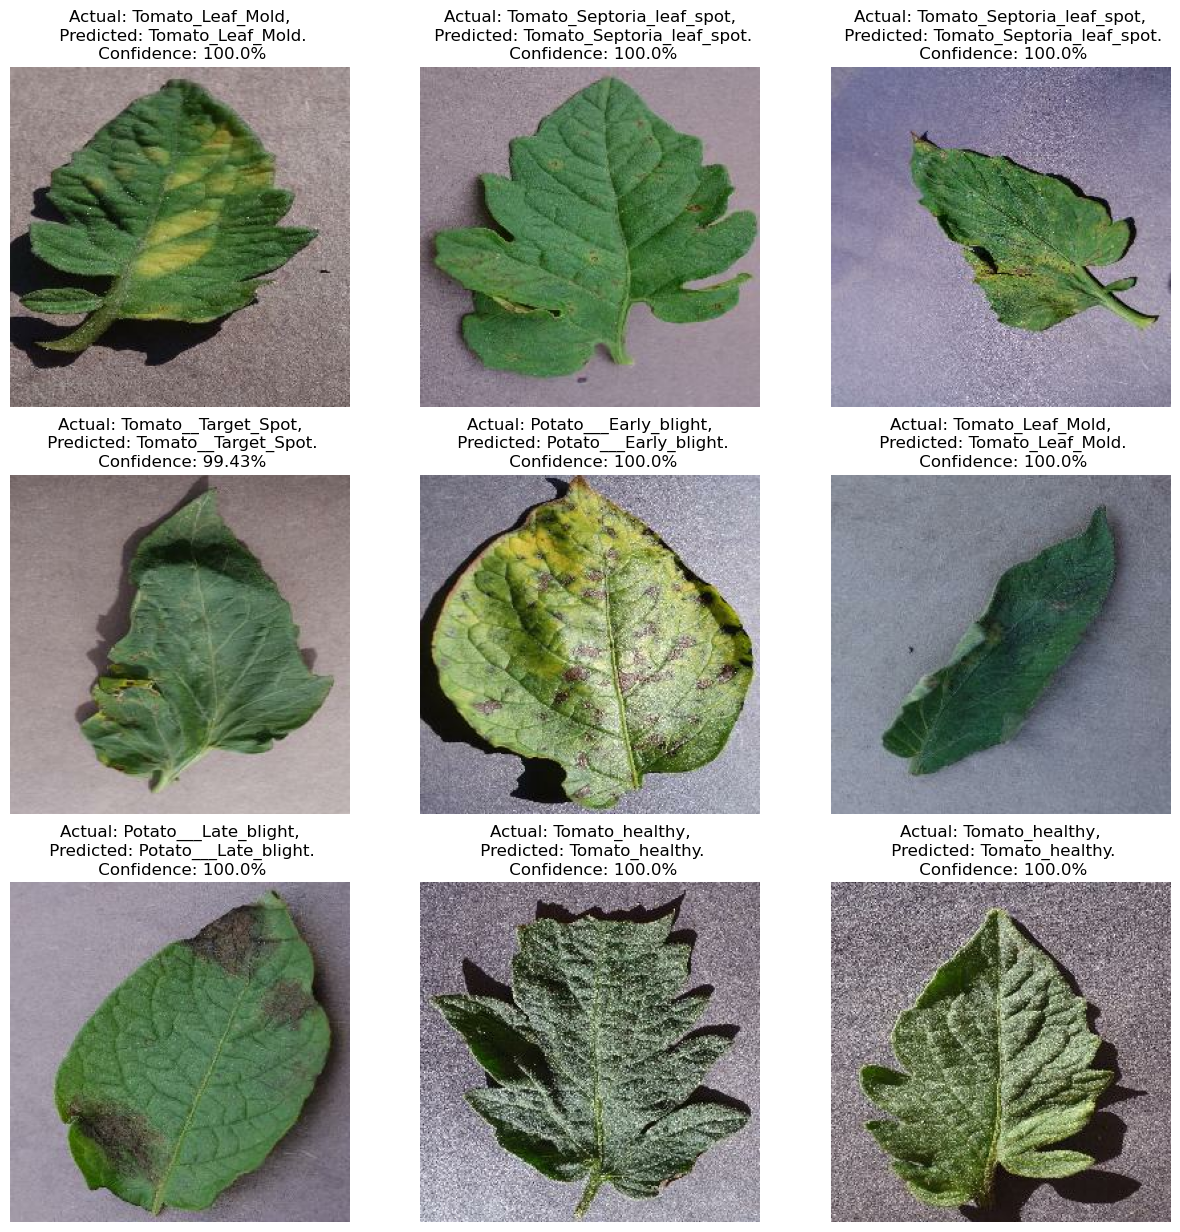

In [39]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [46]:
model_vesion=2
model.save(f"models/{model_vesion}")

INFO:tensorflow:Assets written to: models/2\assets


INFO:tensorflow:Assets written to: models/2\assets


In [45]:
model.save("plantdisease.h5")